# Results model6: acGAN MNIST with 3 Discriminators & ndf=32, without FID logging

In [1]:
# import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.nn.parallel
import argparse
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import random
from torch.nn.parameter import Parameter
import torch.nn.init as init
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
#saved_v = '_6'
saved_v = ''


# Run's random seed

- Fed into torch.manual_seed(manualSeed)

In [2]:
torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/manualSeed_v1.pt')

6208

# Learning curve

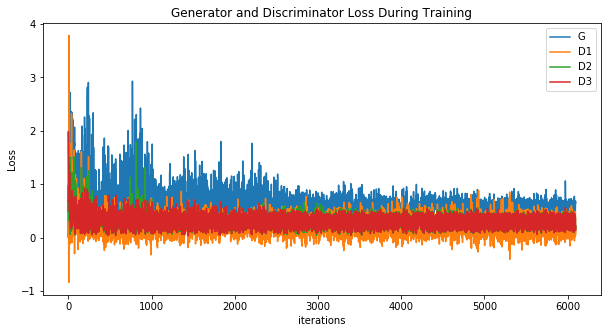

In [17]:

losses_G = torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/losses_G_v1.pt',map_location=torch.device('cpu'))
losses_D = torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/losses_D_v1.pt',map_location=torch.device('cpu'))

plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_G,label="G")
for i in range(0,len(losses_D)):
    plt.plot(losses_D[i],label="D"+str(i+1))
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/losses')

# Policy (curriculum) formation

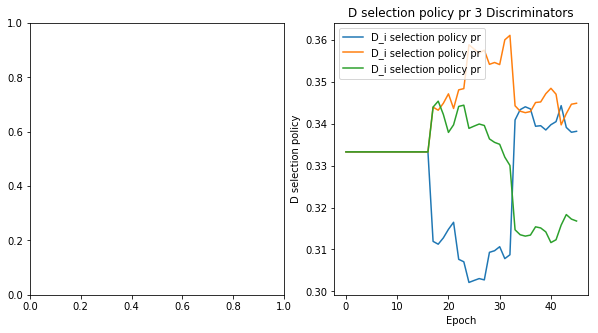

In [69]:
#pis_2 = torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved_4/pis_v1.pt')
pis_3 = torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/pis_v1.pt')

#for idx in range(0, len(pis_2)):
    #pis_2[idx] = pis_2[idx].cpu().numpy()

for idx in range(0, len(pis_3)):
    pis_3[idx] = pis_3[idx].cpu().numpy()
    

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
#plt.title("D selection policy pr 2 Discriminators")
#plt.plot(pis_2,label="D_i selection policy pr")
#plt.xlabel("Epoch")
#plt.ylabel("D selection policy")
#plt.legend()


fig.add_subplot(1,2,2)
plt.title("D selection policy pr 3 Discriminators")
plt.plot(pis_3,label="D_i selection policy pr")
plt.xlabel("Epoch")
plt.ylabel("D selection policy")
plt.legend()


plt.savefig('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/pis')


In [26]:
len(pis)

NameError: name 'pis' is not defined

# FID

FID is not relevant since models trained on MNIST. 

# Original Images

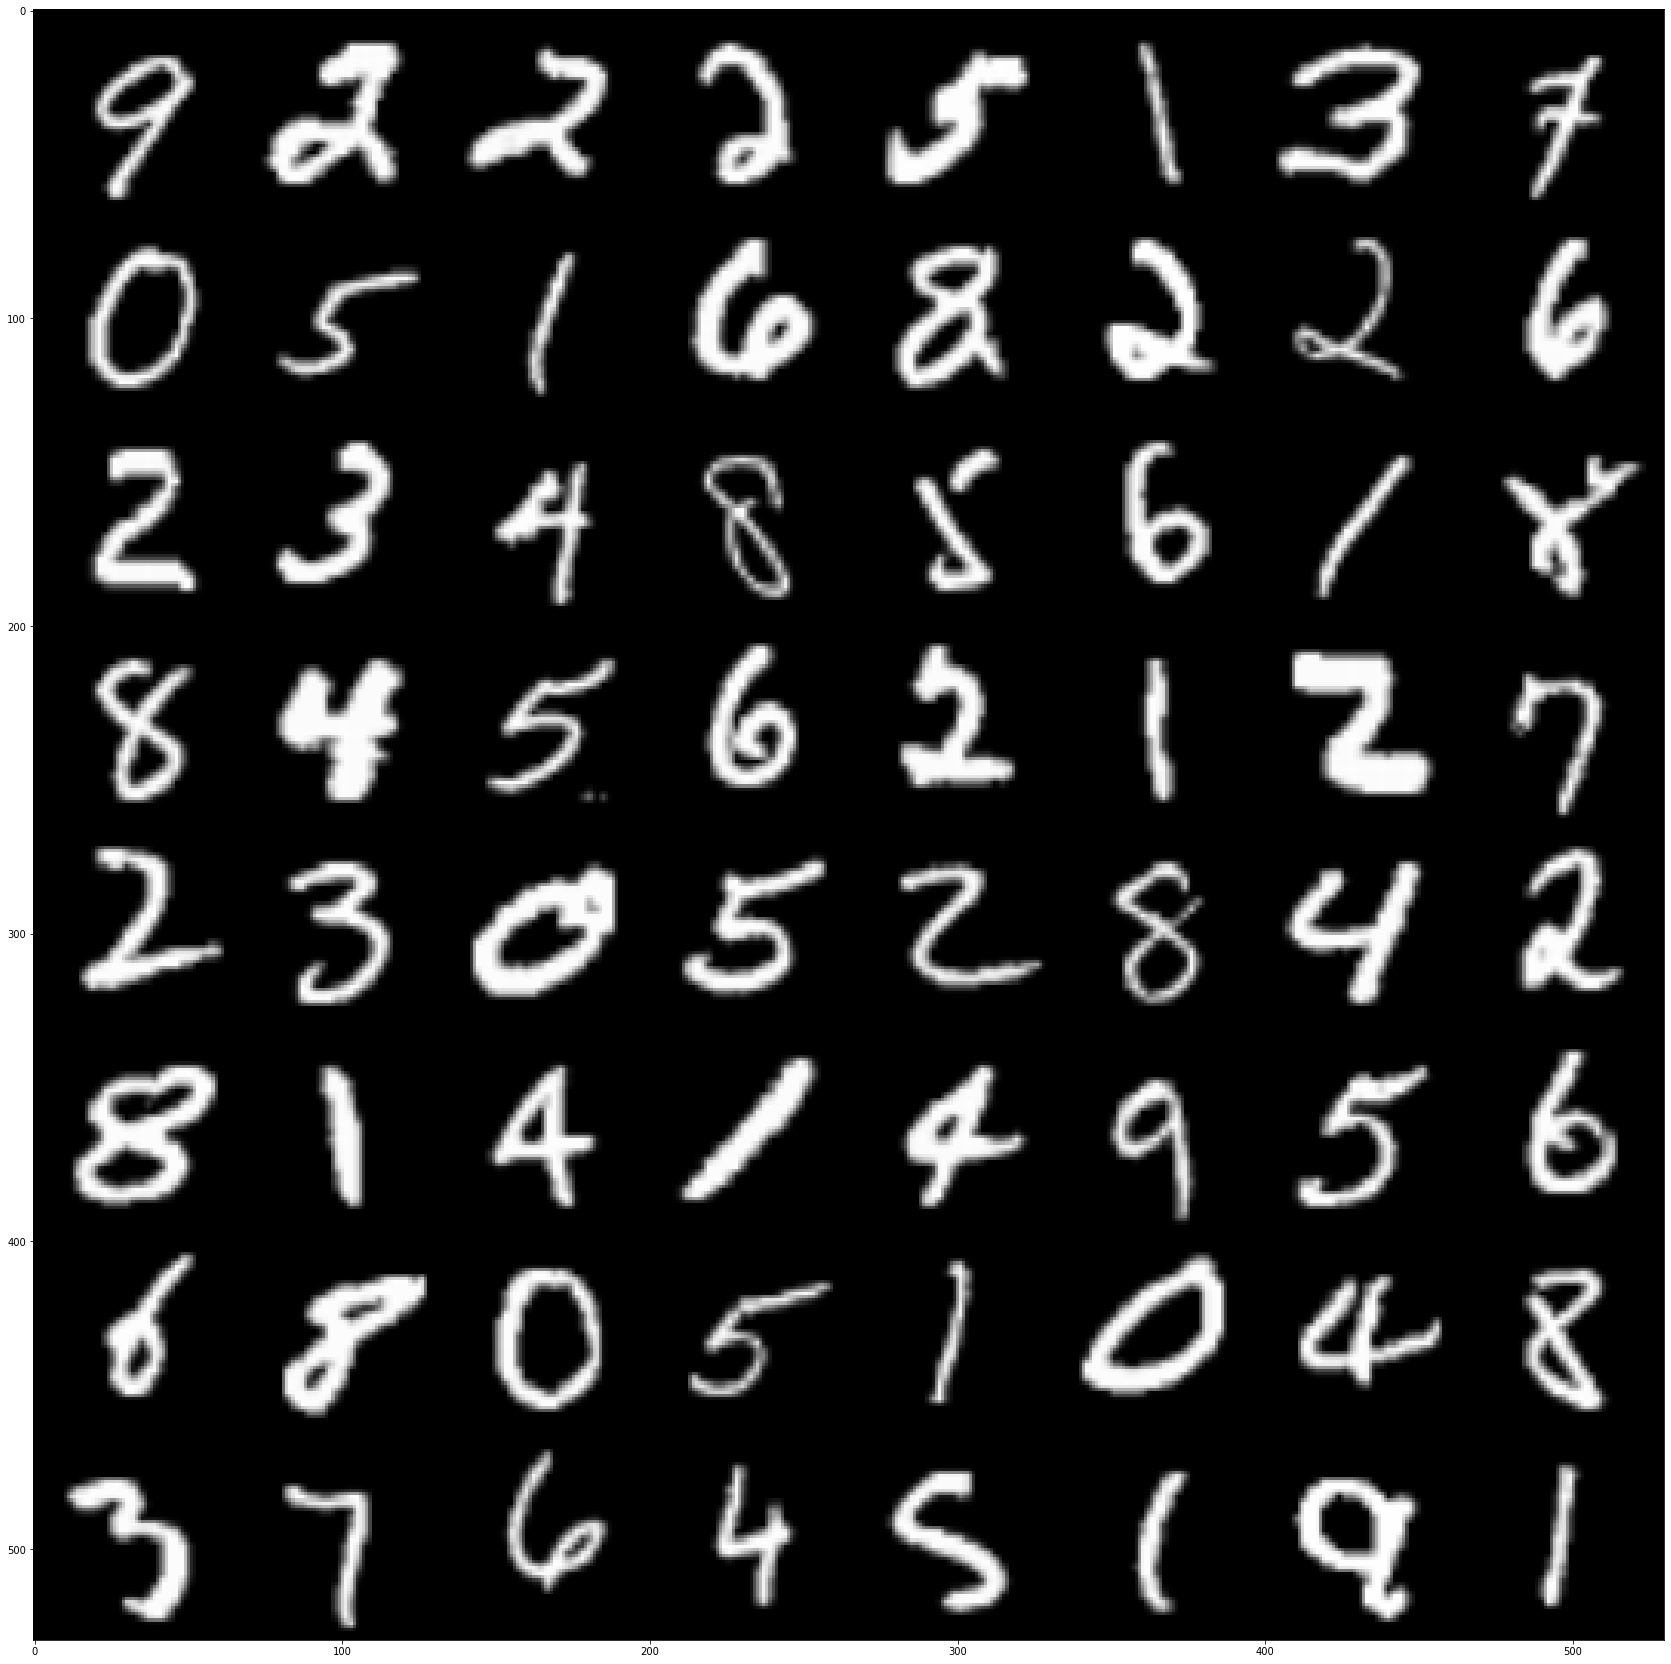

In [32]:
dataloader =  torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/dataloader_v1.pt')
device = 'cuda'
real_batch = next(iter(dataloader))

fig = plt.figure(figsize=(30,30))
fig.add_subplot(1,1,1)
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Generated images

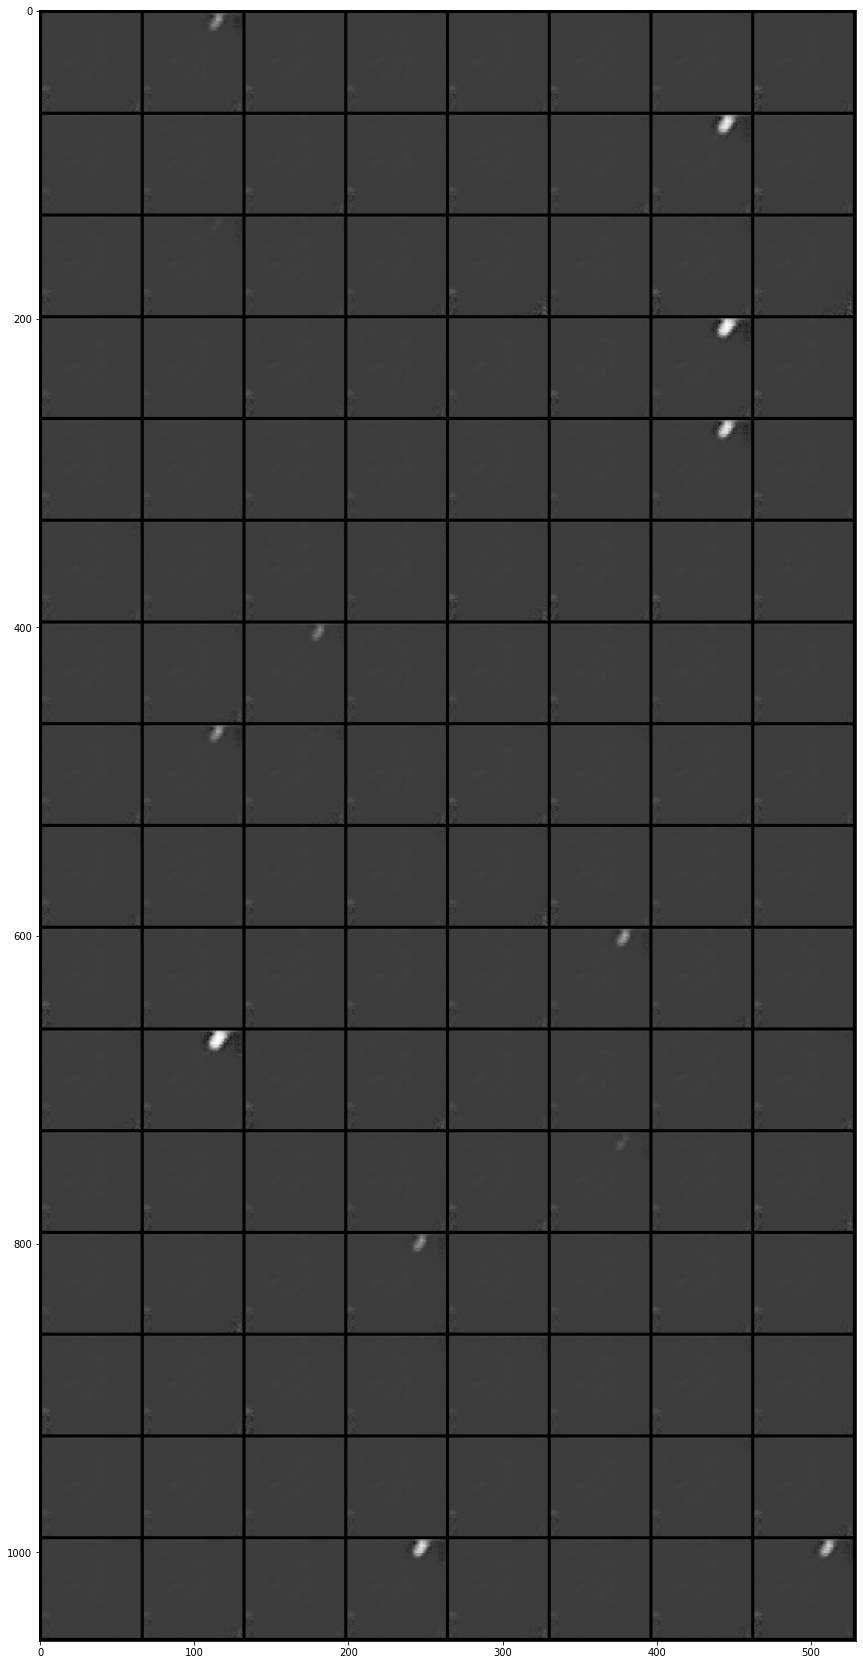

In [33]:
img_list =  torch.load('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/img_list_v1.pt')
fig = plt.figure(figsize=(30,30))
fig.add_subplot(1,1,1)
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.savefig('/home/huawei/mas_implementation/acGAN_mnist/saved'+saved_v+'/fake')

In [34]:
len(img_list)

24

# Machine particulars

In [76]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 158
model name	: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz
stepping	: 9
microcode	: 0xca
cpu MHz		: 4100.907
cache size	: 8192 KB
physical id	: 0
siblings	: 8
core id		: 0
cpu cores	: 4
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 22
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault invpcid_single pti ssbd ibrs ibpb stibp tpr_shadow vnmi flexpriority ept vpid fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx rdseed adx smap clflushopt intel_pt xsaveopt xsavec 

# GPU particulars

In [77]:
!nvidia-smi

Tue Jun  9 15:24:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 00000000:01:00.0 Off |                  N/A |
| 37%   56C    P2    28W / 120W |   1795MiB /  6078MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  